In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import seaborn as sns
%matplotlib inline
import datetime,time
from sklearn.cluster import KMeans


In [179]:
pos=pd.read_csv('pos_device.csv').head(100)
pos1=pos.dropna(inplace=False)

In [180]:
pos1.head(10)

id                    location  merchant_name
0  3143      Weston County, Wyoming  Merchant 3142
1  3142    Washakie County, Wyoming  Merchant 3141
2  3141       Uinta County, Wyoming  Merchant 3140
3  3140       Teton County, Wyoming  Merchant 3139
4  3139  Sweetwater County, Wyoming  Merchant 3138
5  3138    Sublette County, Wyoming  Merchant 3137
6  3137    Sheridan County, Wyoming  Merchant 3136
7  3136      Platte County, Wyoming  Merchant 3135
8  3135        Park County, Wyoming  Merchant 3134
9  3134    Niobrara County, Wyoming  Merchant 3133

In [181]:
def findLen1(msg):
    return msg.split(',')[0].replace('County','')

def findLen2(msg):
    return msg.split(',')[1]
pos1['country1'] = pos1['location'].apply(findLen1)
pos1['name1'] = pos1['location'].apply(findLen2)

   


In [182]:
pos1.head(1)

id                location  merchant_name country1     name1
0  3143  Weston County, Wyoming  Merchant 3142  Weston    Wyoming

In [183]:
tras1=pd.read_csv('transaction.csv').head(100)
#tras=tras1[tras1['account_id']==674].sort_values(['account_id','ts_millis'],axis=0)
tras=pd.read_csv('transaction.csv')



In [184]:
tras.head(10)

id  device_id  transaction_value  account_id  \
0  7904198659766555963       1445              77.79        4588   
1  5180973598844743139       2255             153.28        2255   
2  7972923608280659144       1636              87.52        4779   
3  9194658102408622583       1563              51.81        1563   
4  8382448107208472179       2644              22.17        2644   
5  6660366874560641291         88              66.63        3231   
6  8141418762289150273       1176              72.64        1176   
7  5911096420241268951       2138             116.21        2138   
8  5688150609979105873       2065              81.48        3283   
9  6927312586529936216       1487             114.09        4630   

       ts_millis  
0  1464898317855  
1  1464898317833  
2  1464898317848  
3  1464898317825  
4  1464898317840  
5  1464898317818  
6  1464898317792  
7  1464898317809  
8  1464898317775  
9  1464898317800

In [185]:
zip_num= pd.read_csv('zip_codes_states.csv').dropna()
zip_num.head()

zip   latitude  longitude    city state     county           name
0   3299  43.524872 -71.445841  Tilton    NH    Belknap  New Hampshire
1   7001  40.582845 -74.275240  Avenel    NJ  Middlesex     New Jersey
3   8899  40.520254 -74.420545  Edison    NJ  Middlesex     New Jersey
5  13440  43.208860 -75.383365    Rome    NY     Oneida       New York
6  31546  31.531938 -81.804924   Jesup    GA      Wayne        Georgia

In [186]:
def date_con(a):
    temp = datetime.datetime.fromtimestamp(a).strftime('%Y-%m-%d %H:%M:%S:%mmm')
    return temp

In [187]:
#tras[['device_id']].groupby(['device_id'],as_index=False,axis=0)

#tras['device_id'].cou

In [188]:
acc_ant=pd.value_counts(tras['account_id'],sort=True,ascending=True)

In [189]:
acc_ant.head(10)

2866     8
4875     8
2976     9
4487     9
3993     9
3628    10
3529    10
2139    10
3057    10
1304    11
Name: account_id, dtype: int64

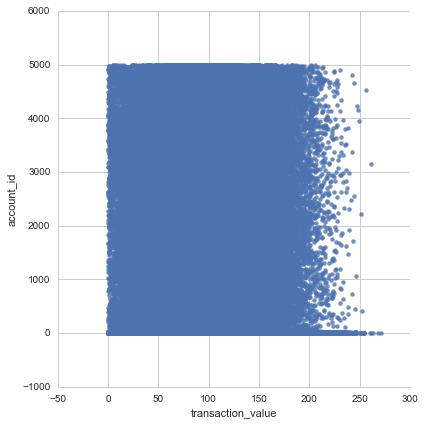

In [95]:
sns.set_style('whitegrid')
sns.lmplot('transaction_value','account_id',data=tras,
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

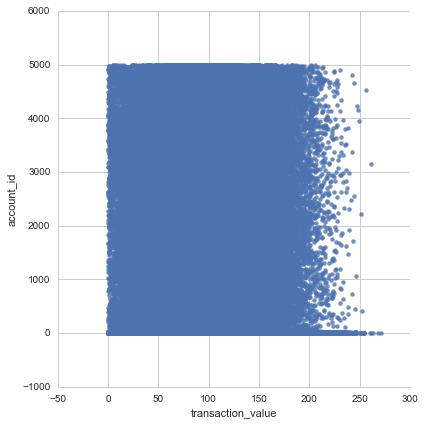

In [190]:
sns.set_style('whitegrid')
sns.lmplot('transaction_value','account_id',data=tras,
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [192]:
tran_pos=pd.merge(tras, pos1, how='right', left_on='device_id', right_on='id')
#pd.merge(left, right, how='left', on=['key1', 'key2'])



In [193]:
pos1[pos1['id']==674].sort_values(['id','location'],axis=0)

Empty DataFrame
Columns: [id, location, merchant_name, country1, name1]
Index: []

In [194]:
tran_pos.head()

id_x  device_id  transaction_value  account_id     ts_millis  id_y  \
0  6.198484e+18     3073.0              25.97      3784.0  1.464898e+12  3073   
1  5.034508e+18     3073.0             124.11      3073.0  1.464898e+12  3073   
2  9.112560e+18     3073.0             140.97      2593.0  1.464898e+12  3073   
3  6.213282e+18     3073.0             110.61      3073.0  1.464898e+12  3073   
4  9.083245e+18     3073.0             113.91      3073.0  1.464898e+12  3073   

                 location  merchant_name country1       name1  
0  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin  
1  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin  
2  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin  
3  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin  
4  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin

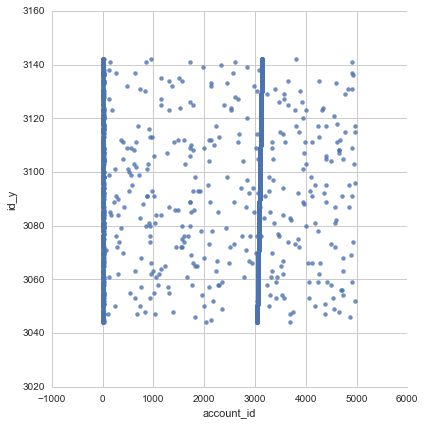

In [195]:
sns.set_style('whitegrid')
sns.lmplot('account_id','id_y',data=tran_pos,
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [104]:
zip_num.head()

zip   latitude  longitude    city state     county           name
0   3299  43.524872 -71.445841  Tilton    NH    Belknap  New Hampshire
1   7001  40.582845 -74.275240  Avenel    NJ  Middlesex     New Jersey
3   8899  40.520254 -74.420545  Edison    NJ  Middlesex     New Jersey
5  13440  43.208860 -75.383365    Rome    NY     Oneida       New York
6  31546  31.531938 -81.804924   Jesup    GA      Wayne        Georgia

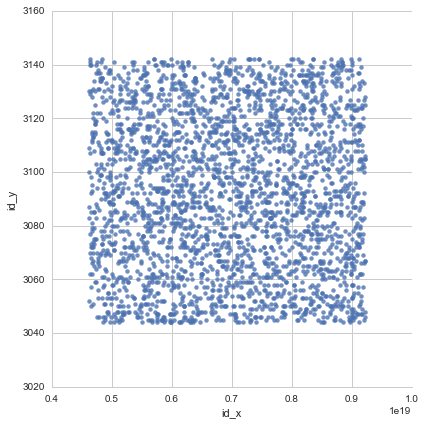

In [196]:
sns.set_style('whitegrid')
sns.lmplot('id_x','id_y',data=tran_pos,
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [197]:
tran_pos.columns

Index(['id_x', 'device_id', 'transaction_value', 'account_id', 'ts_millis',
       'id_y', 'location', 'merchant_name', 'country1', 'name1'],
      dtype='object')

In [198]:
tran_pos.head()

id_x  device_id  transaction_value  account_id     ts_millis  id_y  \
0  6.198484e+18     3073.0              25.97      3784.0  1.464898e+12  3073   
1  5.034508e+18     3073.0             124.11      3073.0  1.464898e+12  3073   
2  9.112560e+18     3073.0             140.97      2593.0  1.464898e+12  3073   
3  6.213282e+18     3073.0             110.61      3073.0  1.464898e+12  3073   
4  9.083245e+18     3073.0             113.91      3073.0  1.464898e+12  3073   

                 location  merchant_name country1       name1  
0  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin  
1  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin  
2  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin  
3  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin  
4  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin

In [199]:
#tran_pos_zip=pd.merge(tran_pos, zip_num, how='inner', left_on= ['country1', 'name1'], right_on=  ['county', 'name'])
tran_pos_zip=pd.merge(tran_pos, zip_num, how='inner', left_on= ['country1','name1'], right_on=  ['county','name'])




In [200]:
tran_pos_zip.head(10)

Empty DataFrame
Columns: [id_x, device_id, transaction_value, account_id, ts_millis, id_y, location, merchant_name, country1, name1, zip, latitude, longitude, city, state, county, name]
Index: []

In [201]:
tran_pos_zip.head()

Empty DataFrame
Columns: [id_x, device_id, transaction_value, account_id, ts_millis, id_y, location, merchant_name, country1, name1, zip, latitude, longitude, city, state, county, name]
Index: []

In [202]:
tran_pos_zip=pd.merge(tran_pos, zip_num, how='inner', left_on= ['device_id'], right_on=  ['zip'])



In [203]:
tran_pos_zip.head()

id_x  device_id  transaction_value  account_id     ts_millis  id_y  \
0  6.198484e+18     3073.0              25.97      3784.0  1.464898e+12  3073   
1  5.034508e+18     3073.0             124.11      3073.0  1.464898e+12  3073   
2  9.112560e+18     3073.0             140.97      2593.0  1.464898e+12  3073   
3  6.213282e+18     3073.0             110.61      3073.0  1.464898e+12  3073   
4  9.083245e+18     3073.0             113.91      3073.0  1.464898e+12  3073   

                 location  merchant_name country1       name1   zip  \
0  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin  3073   
1  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin  3073   
2  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin  3073   
3  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin  3073   
4  Iowa County, Wisconsin  Merchant 3072    Iowa    Wisconsin  3073   

    latitude  longitude         city state      county           name  
0  43.005895 -71.013202  North Salem    NH  Rockingham  New Hampshire  
1  43.005895 -71.013202  North Salem    NH  Rockingham  New Hampshire  
2  43.005895 -71.013202  North Salem    NH  Rockingham  New Hampshire  
3  43.005895 -71.013202  North Salem    NH  Rockingham  New Hampshire  
4  43.005895 -71.013202  North Salem    NH  Rockingham  New Hampshire

In [204]:
tran_pos_zip[['account_id', 'zip']].groupby(['zip'],as_index=False,axis=0,sort=True).count().head(1)


zip  account_id
0  3044          29

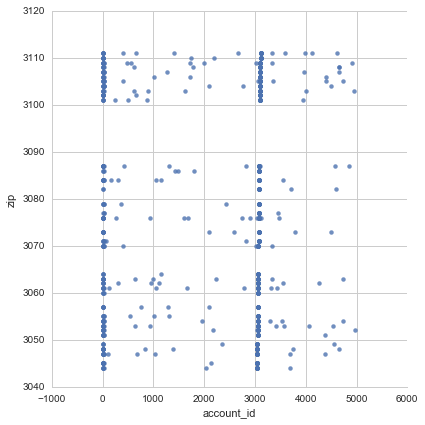

In [113]:
sns.set_style('whitegrid')
sns.lmplot('account_id','zip',data=tran_pos_zip,
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

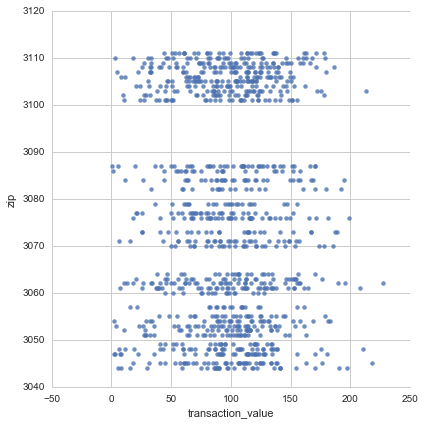

In [205]:
sns.set_style('whitegrid')
sns.lmplot('transaction_value','zip',data=tran_pos_zip,
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [118]:

analysis_data=tran_pos_zip[['id_x','device_id','transaction_value','account_id','ts_millis','latitude','longitude','zip']]
#df['device_id,transaction_value,account_id,ts_millis,zip','latitude','longitude']=tran_pos_zip['device_id,transaction_value,account_id,ts_millis,zip','latitude','longitude']

In [119]:
analysis_data.head()

id_x  device_id  transaction_value  account_id     ts_millis  \
0  6.198484e+18     3073.0              25.97      3784.0  1.464898e+12   
1  5.034508e+18     3073.0             124.11      3073.0  1.464898e+12   
2  9.112560e+18     3073.0             140.97      2593.0  1.464898e+12   
3  6.213282e+18     3073.0             110.61      3073.0  1.464898e+12   
4  9.083245e+18     3073.0             113.91      3073.0  1.464898e+12   

    latitude  longitude   zip  
0  43.005895 -71.013202  3073  
1  43.005895 -71.013202  3073  
2  43.005895 -71.013202  3073  
3  43.005895 -71.013202  3073  
4  43.005895 -71.013202  3073

In [120]:
account_cnt=analysis_data['account_id'].unique()

In [121]:
analysis_data_sor=analysis_data.sort_values(['account_id','ts_millis'],axis=0, ascending=True)

analysis_data_sor.head(10)


id_x  device_id  transaction_value  account_id     ts_millis  \
979  6.218017e+18     3109.0             142.33         0.0  1.465291e+12   
105  5.523774e+18     3076.0              82.04         0.0  1.465291e+12   
980  4.935318e+18     3109.0             129.57         0.0  1.465291e+12   
923  5.416191e+18     3063.0             151.12         0.0  1.465291e+12   
70   7.250209e+18     3102.0              76.59         0.0  1.465291e+12   
174  5.798320e+18     3107.0             100.04         0.0  1.465291e+12   
318  8.540583e+18     3079.0              95.01         0.0  1.465291e+12   
872  8.420866e+18     3054.0             126.13         0.0  1.465291e+12   
724  6.332410e+18     3106.0             142.24         0.0  1.465291e+12   
531  8.238206e+18     3049.0              90.29         0.0  1.465291e+12   

      latitude  longitude   zip  
979  42.970084 -71.405283  3109  
105  42.740651 -71.318715  3076  
980  42.970084 -71.405283  3109  
923  42.774427 -71.511111  3063  
70   43.007883 -71.494561  3102  
174  42.952124 -71.653939  3107  
318  42.872045 -71.196195  3079  
872  42.924928 -71.667508  3054  
724  43.065097 -71.443616  3106  
531  42.859545 -71.581313  3049

In [122]:
analysis_data_sor.columns



Index(['id_x', 'device_id', 'transaction_value', 'account_id', 'ts_millis',
       'latitude', 'longitude', 'zip'],
      dtype='object')

In [123]:
#def  Check_Prev(a):
#    
#    a=analysis_data_sor[i==analysis_data_sor['account_id']]
#    b=a.drop(a.head(1).index, inplace=False)
#    a['ts_millis_dif']=a['ts_millis']-b['ts_millis']
#    a['latitude_diff']=a['latitude']-b['latitude']
#    a['longitude_diff']=a['longitude']-b['longitude']
#    analysis_data_sor['ts_millis_dif','latitude_diff','longitude_diff']=a[a['ts_millis_dif','latitude_diff','longitude_diff']]

#for i in account_cnt:
    # Check_Prev(i)
#    a=analysis_data_sor[i==analysis_data_sor['account_id']]
#    b=a.drop(a.head(1).index, inplace=False)
#    a['ts_millis_dif']=a['ts_millis']-b['ts_millis']
#    a['latitude_diff']=a['latitude']-b['latitude']
#    a['longitude_diff']=a['longitude']-b['longitude']
#    
#    analysis_data_sor['ts_millis_dif','latitude_diff','longitude_diff']=a[a['ts_millis_dif','latitude_diff','longitude_diff']]
#   a.drop()



    
    
#a.head()


In [124]:
analysis_data_sor.head(2)

id_x  device_id  transaction_value  account_id     ts_millis  \
979  6.218017e+18     3109.0             142.33         0.0  1.465291e+12   
105  5.523774e+18     3076.0              82.04         0.0  1.465291e+12   

      latitude  longitude   zip  
979  42.970084 -71.405283  3109  
105  42.740651 -71.318715  3076

In [131]:

analysis_data_sor_b=analysis_data_sor.drop(analysis_data_sor.head(2).index, inplace=False)
analysis_final=pd.merge(analysis_data_sor, analysis_data_sor_b, how='inner', left_on= ['account_id'], right_on=  ['account_id'])
analysis_final.columns

#analysis_a=analysis_final[(analysis_final.ts_millis_x>analysis_final.ts_millis_y)]

analysis_a=analysis_final[(analysis_final['ts_millis_x']>analysis_final['ts_millis_y']+5)]

analysis_a.head(1)

id_x_x  device_id_x  transaction_value_x  account_id   ts_millis_x  \
45  5.416191e+18       3063.0               151.12         0.0  1.465291e+12   

    latitude_x  longitude_x  zip_x        id_x_y  device_id_y  \
45   42.774427   -71.511111   3063  4.935318e+18       3109.0   

    transaction_value_y   ts_millis_y  latitude_y  longitude_y  zip_y  
45               129.57  1.465291e+12   42.970084   -71.405283   3109

In [132]:
#analysis_a[analysis_a['ts_millis_y','ts_millis_x']]
np.where(analysis_a['ts_millis_x']>analysis_a['ts_millis_y'])

(array([   0,    1,    2, ..., 7677, 7678, 7679]),)

In [133]:
analysis_data_sor.head(2)

id_x  device_id  transaction_value  account_id     ts_millis  \
979  6.218017e+18     3109.0             142.33         0.0  1.465291e+12   
105  5.523774e+18     3076.0              82.04         0.0  1.465291e+12   

      latitude  longitude   zip  
979  42.970084 -71.405283  3109  
105  42.740651 -71.318715  3076

In [134]:
analysis_data_sor.head(1)

id_x  device_id  transaction_value  account_id     ts_millis  \
979  6.218017e+18     3109.0             142.33         0.0  1.465291e+12   

      latitude  longitude   zip  
979  42.970084 -71.405283  3109

In [135]:

from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(52.2296756)
lon1 = radians(21.0122287)
lat2 = radians(52.406374)
lon2 = radians(16.9251681)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Result:", distance)
print("Should be:", 278.546, "km")


Result: 278.54558935106695
Should be: 278.546 km


In [136]:
from math import sin, cos, sqrt, atan2, radians



def Convert_Radians(radian):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(radian['latitude_x'])
    lon1 = radians(radian['longitude_x'])
    lat2 = radians(radian['latitude_y'])
    lon2 = radians(radian['longitude_x'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance
   

In [137]:
analysis_a.head(10)




id_x_x  device_id_x  transaction_value_x  account_id   ts_millis_x  \
45  5.416191e+18       3063.0               151.12         0.0  1.465291e+12   
60  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
61  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
75  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
76  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
77  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
90  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   
91  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   
92  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   
93  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   

    latitude_x  longitude_x  zip_x        id_x_y  device_id_y  \
45   42.774427   -71.511111   3063  4.935318e+18       3109.0   
60   43.007883   -71.494561   3102  4.935318e+18       3109.0   
61   43.007883   -71.494561   3102  5.416191e+18       3063.0   
75   42.952124   -71.653939   3107  4.935318e+18       3109.0   
76   42.952124   -71.653939   3107  5.416191e+18       3063.0   
77   42.952124   -71.653939   3107  7.250209e+18       3102.0   
90   42.872045   -71.196195   3079  4.935318e+18       3109.0   
91   42.872045   -71.196195   3079  5.416191e+18       3063.0   
92   42.872045   -71.196195   3079  7.250209e+18       3102.0   
93   42.872045   -71.196195   3079  5.798320e+18       3107.0   

    transaction_value_y   ts_millis_y  latitude_y  longitude_y  zip_y  
45               129.57  1.465291e+12   42.970084   -71.405283   3109  
60               129.57  1.465291e+12   42.970084   -71.405283   3109  
61               151.12  1.465291e+12   42.774427   -71.511111   3063  
75               129.57  1.465291e+12   42.970084   -71.405283   3109  
76               151.12  1.465291e+12   42.774427   -71.511111   3063  
77                76.59  1.465291e+12   43.007883   -71.494561   3102  
90               129.57  1.465291e+12   42.970084   -71.405283   3109  
91               151.12  1.465291e+12   42.774427   -71.511111   3063  
92                76.59  1.465291e+12   43.007883   -71.494561   3102  
93               100.04  1.465291e+12   42.952124   -71.653939   3107

In [138]:
analysis_a['distance']=analysis_a.apply(Convert_Radians,axis = 1)


/Users/vishnoiprem/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [139]:
analysis_a.head()

id_x_x  device_id_x  transaction_value_x  account_id   ts_millis_x  \
45  5.416191e+18       3063.0               151.12         0.0  1.465291e+12   
60  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
61  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
75  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
76  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   

    latitude_x  longitude_x  zip_x        id_x_y  device_id_y  \
45   42.774427   -71.511111   3063  4.935318e+18       3109.0   
60   43.007883   -71.494561   3102  4.935318e+18       3109.0   
61   43.007883   -71.494561   3102  5.416191e+18       3063.0   
75   42.952124   -71.653939   3107  4.935318e+18       3109.0   
76   42.952124   -71.653939   3107  5.416191e+18       3063.0   

    transaction_value_y   ts_millis_y  latitude_y  longitude_y  zip_y  \
45               129.57  1.465291e+12   42.970084   -71.405283   3109   
60               129.57  1.465291e+12   42.970084   -71.405283   3109   
61               151.12  1.465291e+12   42.774427   -71.511111   3063   
75               129.57  1.465291e+12   42.970084   -71.405283   3109   
76               151.12  1.465291e+12   42.774427   -71.511111   3063   

     distance  
45  21.762895  
60   4.204376  
61  25.967272  
75   1.997688  
76  19.765208

In [140]:
def Diff(analysis_a):
    
    
    # approximate radius of earth in km
    R = 6373.0

    diff = analysis_a['ts_millis_x']-analysis_a['ts_millis_y']
   
    distance = diff
    return distance




analysis_a['diff_first_second']=analysis_a.apply(Diff,axis = 1)



/Users/vishnoiprem/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [141]:
analysis_a.head()

id_x_x  device_id_x  transaction_value_x  account_id   ts_millis_x  \
45  5.416191e+18       3063.0               151.12         0.0  1.465291e+12   
60  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
61  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
75  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
76  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   

    latitude_x  longitude_x  zip_x        id_x_y  device_id_y  \
45   42.774427   -71.511111   3063  4.935318e+18       3109.0   
60   43.007883   -71.494561   3102  4.935318e+18       3109.0   
61   43.007883   -71.494561   3102  5.416191e+18       3063.0   
75   42.952124   -71.653939   3107  4.935318e+18       3109.0   
76   42.952124   -71.653939   3107  5.416191e+18       3063.0   

    transaction_value_y   ts_millis_y  latitude_y  longitude_y  zip_y  \
45               129.57  1.465291e+12   42.970084   -71.405283   3109   
60               129.57  1.465291e+12   42.970084   -71.405283   3109   
61               151.12  1.465291e+12   42.774427   -71.511111   3063   
75               129.57  1.465291e+12   42.970084   -71.405283   3109   
76               151.12  1.465291e+12   42.774427   -71.511111   3063   

     distance  diff_first_second  
45  21.762895            85883.0  
60   4.204376           120617.0  
61  25.967272            34734.0  
75   1.997688           223491.0  
76  19.765208           137608.0

In [142]:
avg=analysis_a[['account_id','distance']].groupby('distance',axis=0,as_index=False ).apply(np.mean)

analysis_a['average']=analysis_a['distance'].mean()


/Users/vishnoiprem/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [143]:

def frd(frd_txn):
    #a=analysis_a[['account_id','distance']].groupby('distance',axis=0,as_index=False ).apply(np.mean)
    frd_txn[(frd_txn.distance>frd_txn.average)]
  

In [144]:
analysis_a.head(10)



id_x_x  device_id_x  transaction_value_x  account_id   ts_millis_x  \
45  5.416191e+18       3063.0               151.12         0.0  1.465291e+12   
60  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
61  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
75  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
76  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
77  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
90  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   
91  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   
92  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   
93  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   

    latitude_x  longitude_x  zip_x        id_x_y  device_id_y  \
45   42.774427   -71.511111   3063  4.935318e+18       3109.0   
60   43.007883   -71.494561   3102  4.935318e+18       3109.0   
61   43.007883   -71.494561   3102  5.416191e+18       3063.0   
75   42.952124   -71.653939   3107  4.935318e+18       3109.0   
76   42.952124   -71.653939   3107  5.416191e+18       3063.0   
77   42.952124   -71.653939   3107  7.250209e+18       3102.0   
90   42.872045   -71.196195   3079  4.935318e+18       3109.0   
91   42.872045   -71.196195   3079  5.416191e+18       3063.0   
92   42.872045   -71.196195   3079  7.250209e+18       3102.0   
93   42.872045   -71.196195   3079  5.798320e+18       3107.0   

    transaction_value_y   ts_millis_y  latitude_y  longitude_y  zip_y  \
45               129.57  1.465291e+12   42.970084   -71.405283   3109   
60               129.57  1.465291e+12   42.970084   -71.405283   3109   
61               151.12  1.465291e+12   42.774427   -71.511111   3063   
75               129.57  1.465291e+12   42.970084   -71.405283   3109   
76               151.12  1.465291e+12   42.774427   -71.511111   3063   
77                76.59  1.465291e+12   43.007883   -71.494561   3102   
90               129.57  1.465291e+12   42.970084   -71.405283   3109   
91               151.12  1.465291e+12   42.774427   -71.511111   3063   
92                76.59  1.465291e+12   43.007883   -71.494561   3102   
93               100.04  1.465291e+12   42.952124   -71.653939   3107   

     distance  diff_first_second   average  
45  21.762895            85883.0  1.580835  
60   4.204376           120617.0  1.580835  
61  25.967272            34734.0  1.580835  
75   1.997688           223491.0  1.580835  
76  19.765208           137608.0  1.580835  
77   6.202064           102874.0  1.580835  
90  10.904862           236638.0  1.580835  
91  10.858034           150755.0  1.580835  
92  15.109238           116021.0  1.580835  
93   8.907174            13147.0  1.580835

In [145]:
analysis_a[(analysis_a.distance)==(analysis_a.distance)].head(10)



id_x_x  device_id_x  transaction_value_x  account_id   ts_millis_x  \
45  5.416191e+18       3063.0               151.12         0.0  1.465291e+12   
60  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
61  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
75  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
76  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
77  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
90  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   
91  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   
92  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   
93  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   

    latitude_x  longitude_x  zip_x        id_x_y  device_id_y  \
45   42.774427   -71.511111   3063  4.935318e+18       3109.0   
60   43.007883   -71.494561   3102  4.935318e+18       3109.0   
61   43.007883   -71.494561   3102  5.416191e+18       3063.0   
75   42.952124   -71.653939   3107  4.935318e+18       3109.0   
76   42.952124   -71.653939   3107  5.416191e+18       3063.0   
77   42.952124   -71.653939   3107  7.250209e+18       3102.0   
90   42.872045   -71.196195   3079  4.935318e+18       3109.0   
91   42.872045   -71.196195   3079  5.416191e+18       3063.0   
92   42.872045   -71.196195   3079  7.250209e+18       3102.0   
93   42.872045   -71.196195   3079  5.798320e+18       3107.0   

    transaction_value_y   ts_millis_y  latitude_y  longitude_y  zip_y  \
45               129.57  1.465291e+12   42.970084   -71.405283   3109   
60               129.57  1.465291e+12   42.970084   -71.405283   3109   
61               151.12  1.465291e+12   42.774427   -71.511111   3063   
75               129.57  1.465291e+12   42.970084   -71.405283   3109   
76               151.12  1.465291e+12   42.774427   -71.511111   3063   
77                76.59  1.465291e+12   43.007883   -71.494561   3102   
90               129.57  1.465291e+12   42.970084   -71.405283   3109   
91               151.12  1.465291e+12   42.774427   -71.511111   3063   
92                76.59  1.465291e+12   43.007883   -71.494561   3102   
93               100.04  1.465291e+12   42.952124   -71.653939   3107   

     distance  diff_first_second   average  
45  21.762895            85883.0  1.580835  
60   4.204376           120617.0  1.580835  
61  25.967272            34734.0  1.580835  
75   1.997688           223491.0  1.580835  
76  19.765208           137608.0  1.580835  
77   6.202064           102874.0  1.580835  
90  10.904862           236638.0  1.580835  
91  10.858034           150755.0  1.580835  
92  15.109238           116021.0  1.580835  
93   8.907174            13147.0  1.580835

In [146]:
analysis_a.head()

id_x_x  device_id_x  transaction_value_x  account_id   ts_millis_x  \
45  5.416191e+18       3063.0               151.12         0.0  1.465291e+12   
60  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
61  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
75  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
76  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   

    latitude_x  longitude_x  zip_x        id_x_y  device_id_y  \
45   42.774427   -71.511111   3063  4.935318e+18       3109.0   
60   43.007883   -71.494561   3102  4.935318e+18       3109.0   
61   43.007883   -71.494561   3102  5.416191e+18       3063.0   
75   42.952124   -71.653939   3107  4.935318e+18       3109.0   
76   42.952124   -71.653939   3107  5.416191e+18       3063.0   

    transaction_value_y   ts_millis_y  latitude_y  longitude_y  zip_y  \
45               129.57  1.465291e+12   42.970084   -71.405283   3109   
60               129.57  1.465291e+12   42.970084   -71.405283   3109   
61               151.12  1.465291e+12   42.774427   -71.511111   3063   
75               129.57  1.465291e+12   42.970084   -71.405283   3109   
76               151.12  1.465291e+12   42.774427   -71.511111   3063   

     distance  diff_first_second   average  
45  21.762895            85883.0  1.580835  
60   4.204376           120617.0  1.580835  
61  25.967272            34734.0  1.580835  
75   1.997688           223491.0  1.580835  
76  19.765208           137608.0  1.580835

In [150]:
def fraud(analysis_a):
    diff = analysis_a['average'] 
    diff_in_sec=analysis_a['diff_first_second']/1000
    if diff>0 and diff_in_sec>1000:
        return 1
    elif diff/diff_in_sec>=100:
        return 1
    else:
        return 0
analysis_a['fraud']=analysis_a.apply(fraud,axis = 1)


analysis_a.head(10)

/Users/vishnoiprem/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


id_x_x  device_id_x  transaction_value_x  account_id   ts_millis_x  \
45  5.416191e+18       3063.0               151.12         0.0  1.465291e+12   
60  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
61  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
75  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
76  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
77  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
90  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   
91  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   
92  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   
93  8.540583e+18       3079.0                95.01         0.0  1.465291e+12   

    latitude_x  longitude_x  zip_x        id_x_y  device_id_y  \
45   42.774427   -71.511111   3063  4.935318e+18       3109.0   
60   43.007883   -71.494561   3102  4.935318e+18       3109.0   
61   43.007883   -71.494561   3102  5.416191e+18       3063.0   
75   42.952124   -71.653939   3107  4.935318e+18       3109.0   
76   42.952124   -71.653939   3107  5.416191e+18       3063.0   
77   42.952124   -71.653939   3107  7.250209e+18       3102.0   
90   42.872045   -71.196195   3079  4.935318e+18       3109.0   
91   42.872045   -71.196195   3079  5.416191e+18       3063.0   
92   42.872045   -71.196195   3079  7.250209e+18       3102.0   
93   42.872045   -71.196195   3079  5.798320e+18       3107.0   

    transaction_value_y   ts_millis_y  latitude_y  longitude_y  zip_y  \
45               129.57  1.465291e+12   42.970084   -71.405283   3109   
60               129.57  1.465291e+12   42.970084   -71.405283   3109   
61               151.12  1.465291e+12   42.774427   -71.511111   3063   
75               129.57  1.465291e+12   42.970084   -71.405283   3109   
76               151.12  1.465291e+12   42.774427   -71.511111   3063   
77                76.59  1.465291e+12   43.007883   -71.494561   3102   
90               129.57  1.465291e+12   42.970084   -71.405283   3109   
91               151.12  1.465291e+12   42.774427   -71.511111   3063   
92                76.59  1.465291e+12   43.007883   -71.494561   3102   
93               100.04  1.465291e+12   42.952124   -71.653939   3107   

     distance  diff_first_second   average  fraud  
45  21.762895            85883.0  1.580835      0  
60   4.204376           120617.0  1.580835      0  
61  25.967272            34734.0  1.580835      0  
75   1.997688           223491.0  1.580835      0  
76  19.765208           137608.0  1.580835      0  
77   6.202064           102874.0  1.580835      0  
90  10.904862           236638.0  1.580835      0  
91  10.858034           150755.0  1.580835      0  
92  15.109238           116021.0  1.580835      0  
93   8.907174            13147.0  1.580835      0

In [151]:
analysis_a.head()

id_x_x  device_id_x  transaction_value_x  account_id   ts_millis_x  \
45  5.416191e+18       3063.0               151.12         0.0  1.465291e+12   
60  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
61  7.250209e+18       3102.0                76.59         0.0  1.465291e+12   
75  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   
76  5.798320e+18       3107.0               100.04         0.0  1.465291e+12   

    latitude_x  longitude_x  zip_x        id_x_y  device_id_y  \
45   42.774427   -71.511111   3063  4.935318e+18       3109.0   
60   43.007883   -71.494561   3102  4.935318e+18       3109.0   
61   43.007883   -71.494561   3102  5.416191e+18       3063.0   
75   42.952124   -71.653939   3107  4.935318e+18       3109.0   
76   42.952124   -71.653939   3107  5.416191e+18       3063.0   

    transaction_value_y   ts_millis_y  latitude_y  longitude_y  zip_y  \
45               129.57  1.465291e+12   42.970084   -71.405283   3109   
60               129.57  1.465291e+12   42.970084   -71.405283   3109   
61               151.12  1.465291e+12   42.774427   -71.511111   3063   
75               129.57  1.465291e+12   42.970084   -71.405283   3109   
76               151.12  1.465291e+12   42.774427   -71.511111   3063   

     distance  diff_first_second   average  fraud  
45  21.762895            85883.0  1.580835      0  
60   4.204376           120617.0  1.580835      0  
61  25.967272            34734.0  1.580835      0  
75   1.997688           223491.0  1.580835      0  
76  19.765208           137608.0  1.580835      0

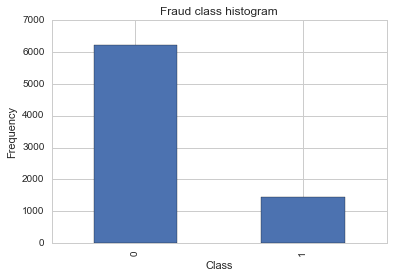

In [152]:
count_classes = pd.value_counts(analysis_a['fraud'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

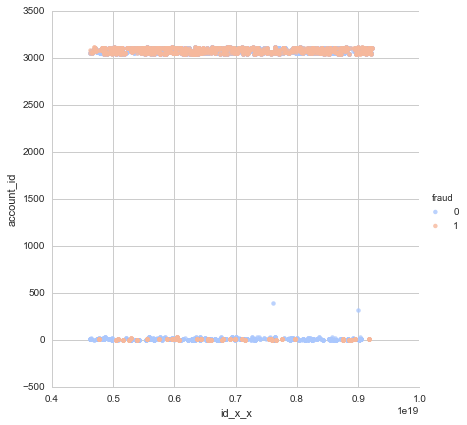

In [154]:
sns.set_style('whitegrid')
sns.lmplot('id_x_x','account_id',data=analysis_a, hue='fraud',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

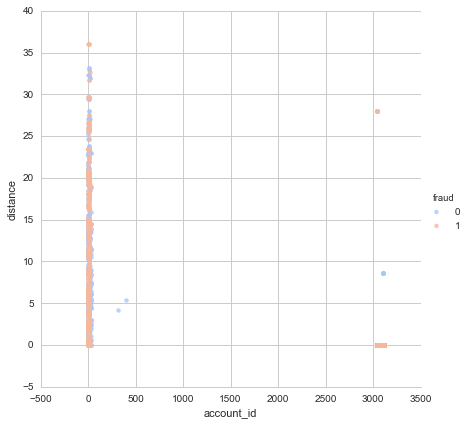

In [160]:
sns.set_style('whitegrid')
sns.lmplot('account_id','distance',data=analysis_a, hue='fraud',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

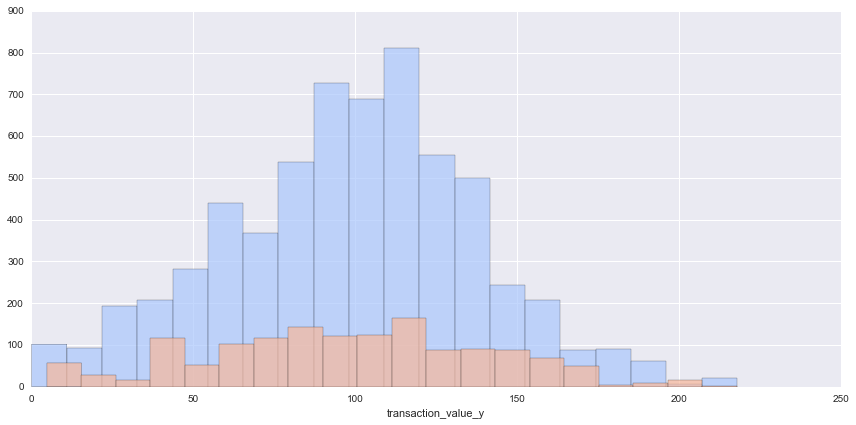

In [162]:
sns.set_style('darkgrid')
g = sns.FacetGrid(analysis_a,hue="fraud",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'transaction_value_y',bins=20,alpha=0.7)

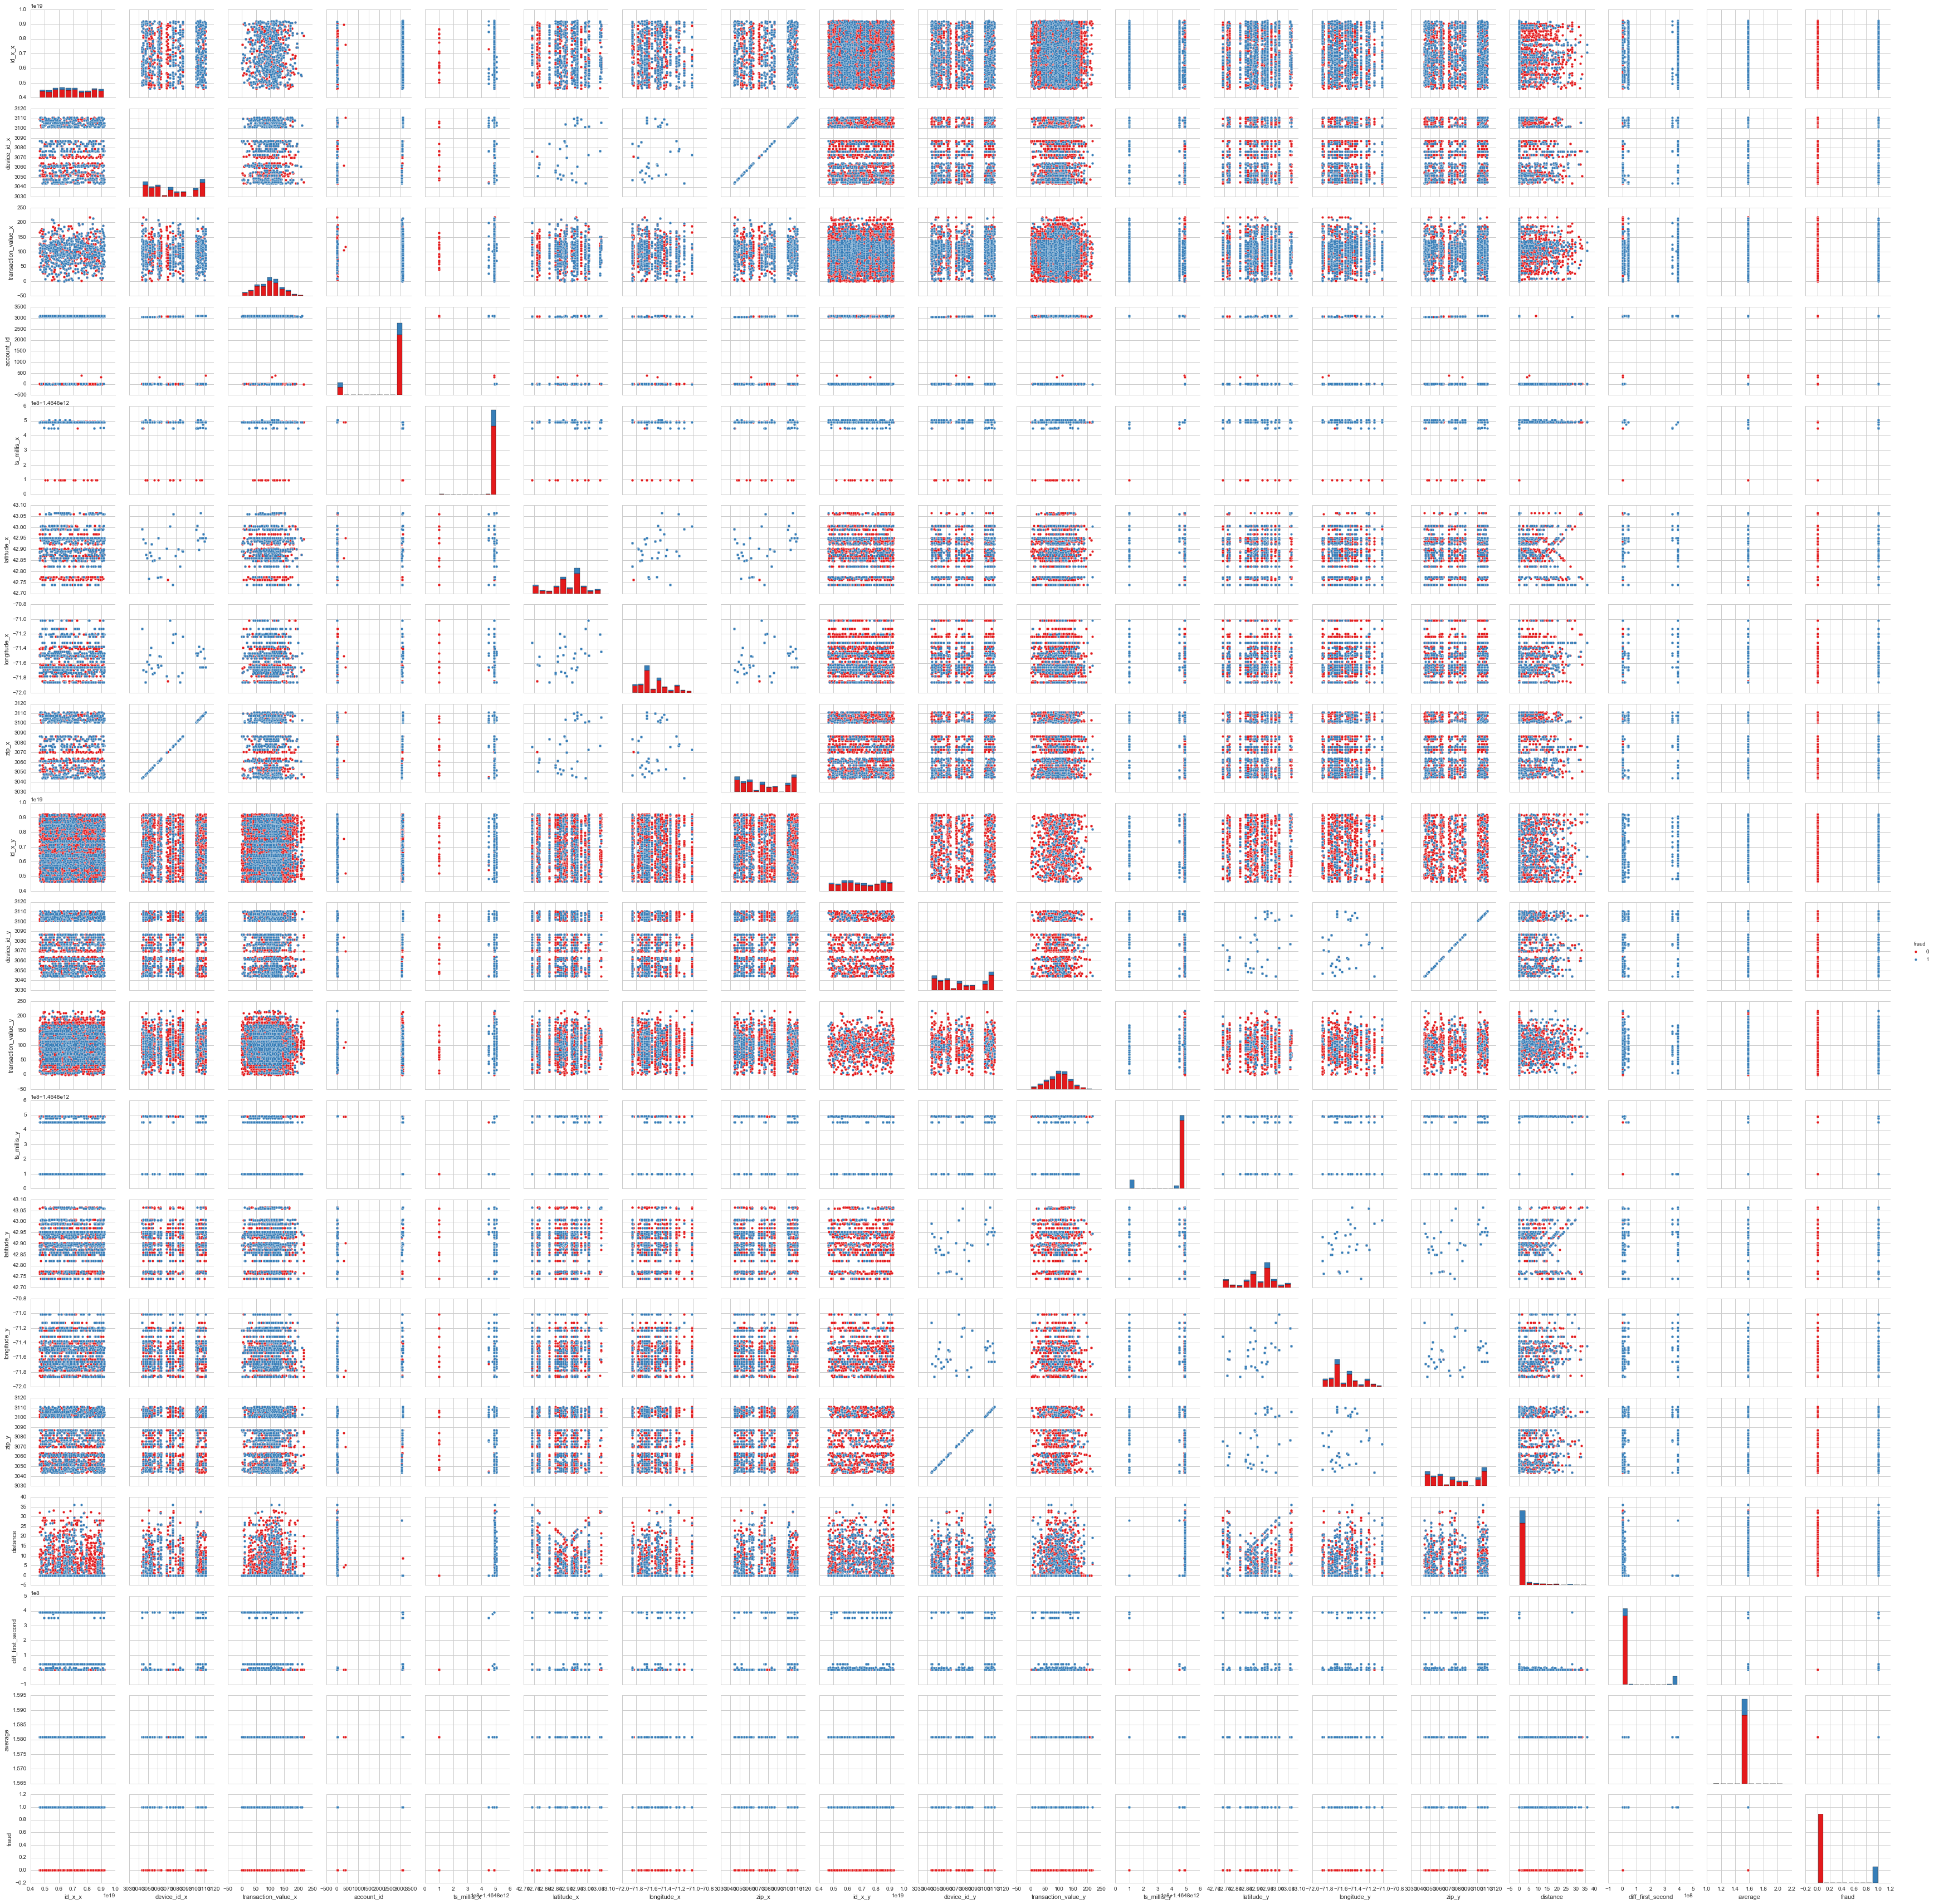

In [206]:
sns.pairplot(analysis_a,hue='fraud',palette='Set1')

In [156]:
tras=pd.read_csv('transaction.csv').head(10)
tras.head()

id  device_id  transaction_value  account_id  \
0  7904198659766555963       1445              77.79        4588   
1  5180973598844743139       2255             153.28        2255   
2  7972923608280659144       1636              87.52        4779   
3  9194658102408622583       1563              51.81        1563   
4  8382448107208472179       2644              22.17        2644   

       ts_millis  
0  1464898317855  
1  1464898317833  
2  1464898317848  
3  1464898317825  
4  1464898317840

In [165]:
from sklearn.cluster import KMeans

In [166]:
kmeans = KMeans(n_clusters=2)

In [167]:
kmeans.fit(analysis_a.drop('fraud',axis=1))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [168]:
kmeans.cluster_centers_

array([[  6.88296567e+18,   3.07687455e+03,   9.64903756e+01,
          2.59066097e+03,   1.46528937e+12,   4.29097661e+01,
         -7.15482808e+01,   3.07687455e+03,   5.84025565e+18,
          3.07734168e+03,   9.73988948e+01,   1.46524639e+12,
          4.29115063e+01,  -7.15517032e+01,   3.07734168e+03,
          1.67468317e+00,   4.29822439e+07,   1.58083500e+00],
       [  6.96142820e+18,   3.07481316e+03,   9.64847916e+01,
          2.65675617e+03,   1.46528868e+12,   4.29069926e+01,
         -7.15464579e+01,   3.07481316e+03,   8.21666329e+18,
          3.07547547e+03,   9.89461185e+01,   1.46525223e+12,
          4.29088337e+01,  -7.15459277e+01,   3.07547547e+03,
          1.47032991e+00,   3.64481963e+07,   1.58083500e+00]])

In [169]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [170]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(analysis_a['fraud'],kmeans.labels_))
print(classification_report(analysis_a['fraud'],kmeans.labels_))

[[3310 2912]
 [ 843  615]]
             precision    recall  f1-score   support

          0       0.80      0.53      0.64      6222
          1       0.17      0.42      0.25      1458

avg / total       0.68      0.51      0.56      7680



In [171]:
analysis_a.columns

Index(['id_x_x', 'device_id_x', 'transaction_value_x', 'account_id',
       'ts_millis_x', 'latitude_x', 'longitude_x', 'zip_x', 'id_x_y',
       'device_id_y', 'transaction_value_y', 'ts_millis_y', 'latitude_y',
       'longitude_y', 'zip_y', 'distance', 'diff_first_second', 'average',
       'fraud'],
      dtype='object')

In [176]:
#analysis_a[analysis_a['id_x_x', 'zip_x', 'device_id_y', 'transaction_value_y', 'latitude_y', 'longitude_y', 'fraud']]
analysis_a.to_csv('dbshack2hire_10_model.csv')

In [157]:

tras=pd.read_csv('transaction.csv').head(100)


from sklearn.preprocessing import StandardScaler

tras['normAmount'] = StandardScaler().fit_transform(tras['transaction_value'].reshape(-1, 1))
tras = tras.drop(['ts_millis','transaction_value'],axis=1)
tras.head()

id  device_id  account_id  normAmount
0  7904198659766555963       1445        4588   -0.369936
1  5180973598844743139       2255        2255    1.671607
2  7972923608280659144       1636        4779   -0.106799
3  9194658102408622583       1563        1563   -1.072536
4  8382448107208472179       2644        2644   -1.874117

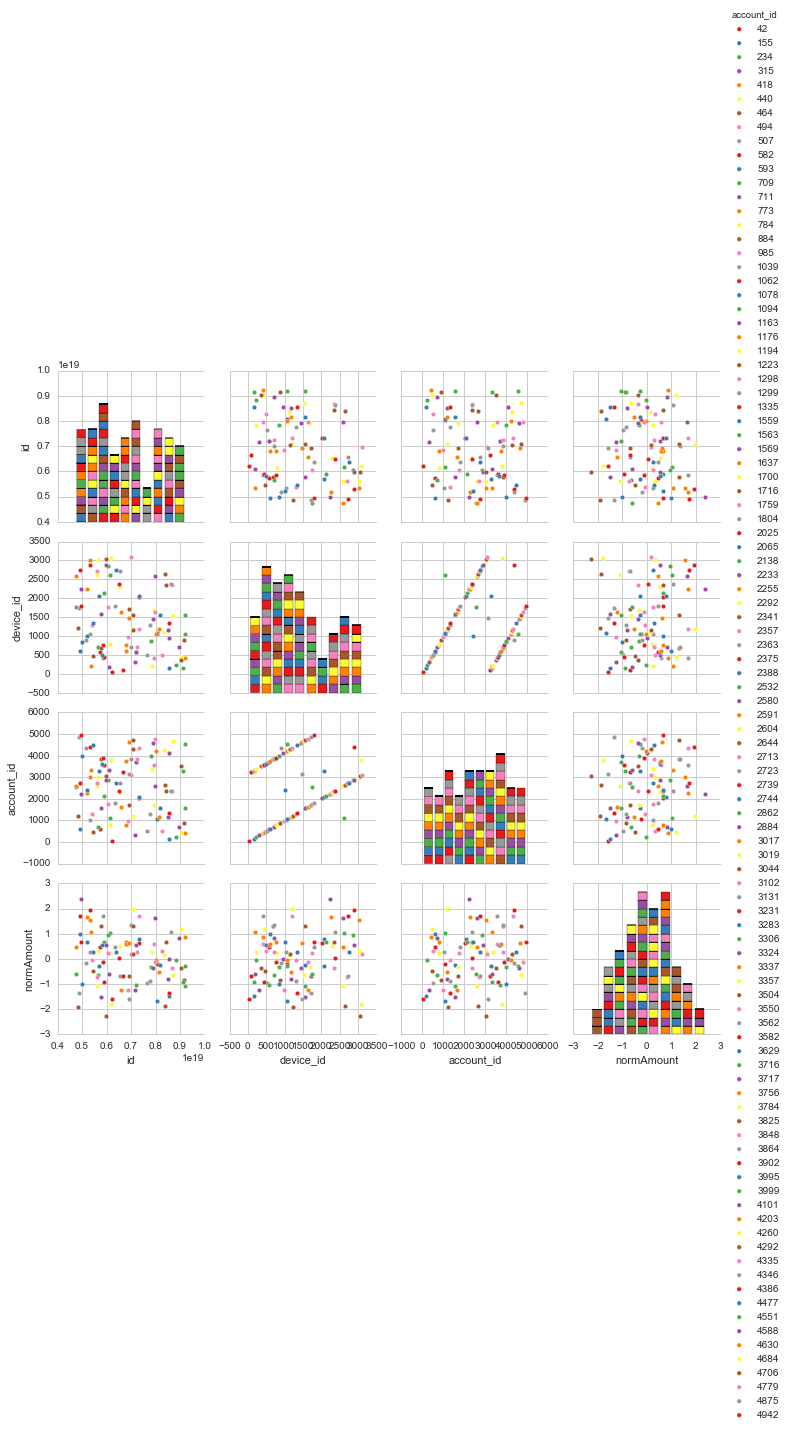

In [158]:
sns.pairplot(tras,hue='account_id',palette='Set1')

TypeError: string indices must be integers

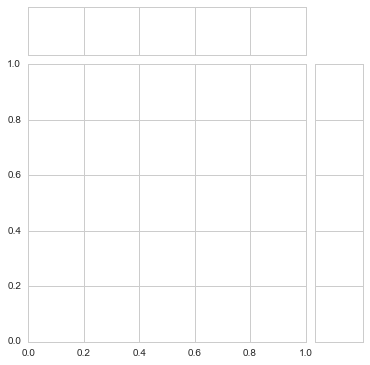

In [159]:
sns.jointplot(x='ts_millis',y='normAmount',data=tras)

In [ ]:
sns.pairplot(tras)

In [ ]:
sns.lmplot(x='account_id',y='normAmount',data=customers)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(df.drop('fraud',axis=1))


In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(tras['account_id'],kmeans.labels_))
print(classification_report(tras['normAmount'],kmeans.labels_))

In [ ]:
z